# Introducción
    El siguiente trabajo consta de un estudio de análisis de elasticidad demanda-precio en contexto inflacionario de las ventas de distribuidores del sector consumo masivo en formato B2B, para lograr estimar mediante un modelo de machien learning la demanda que se consiguiera al realizar un aumento de precio en tal contexto.

### Objetivo
    El objetivo de este trabajo es realizar un modelo que pueda estimar la variación de demanda que sufrirá una empresa al subir o bajar precios en un contexto inflacionario.

In [1]:
#Importo librerías
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib.ticker import FuncFormatter
import matplotlib.gridspec as gridspec

In [2]:
#Función para mostrar valores en formato $
def formato_dolar_simple(valor):
    return f'${valor:.0f}'

#Función para mostrar valores en formato miles
def formato_miles_simple(valor):
    return "{:,.0f}".format(int(valor)).replace(",", "@").replace(".", ",").replace("@", ".")

#Función para mostrar valores en formato $
def formato_dolar_etiqueta(valor, _):
    return f'${valor:.0f}'

#Función para mostrar valores en formato miles
def formato_miles_etiqueta(valor, _):
    return "{:,.0f}".format(int(valor)).replace(",", "@").replace(".", ",").replace("@", ".")

In [3]:
#Parámetros de gráficos
sns.set(style="ticks", font_scale=1, rc={"font.family": "Segoe UI"})

In [5]:
#cargo dataset
url = "https://github.com/Hart-Hunt/Coderhouse---Data-Science/blob/main/Base%20Ventas%20Retail%20v2.csv"
dataset_orig = pd.read_csv(url, sep=';')

ParserError: Error tokenizing data. C error: Expected 1 fields in line 135, saw 5


In [7]:
df = dataset_orig

### Dataset:
    El dataset planteado contiene información de ventas de distribuidores del sector de consumo masivo operando en la región de Gran Buenos Aires y Capital Federal (AMBA).
    Los datos se presentan a nivel de granularidad producto-cliente, agrupados por semana.
###### Anonimización:
    Por cuestiones de confidencialidad, los campos descriptivos de tanto los productos como los clientes fueron anonimizados previo al comienzo de este análisis mediante seudonimización. Campos tales como localidad, partido, zona, canal no fueron alterados del dataset original.

# Exploratory Data Analysis (EDA)

### Limpieza del dataset
    Comenzamos a detallar y analizar el dataset.

In [8]:
#Viendo la cantidad de campos y registros
df.shape

(257562, 19)

    El dataset contiene una gran cantidad de registros y campos. Veamos los campos con una pequeña muestra.

In [9]:
df.sample(5)

,Código Producto,Marca,Presentación,Producto,KG / Pack,KG / U,U / Pack,Código Cliente,Localidad,Partido,Zona,Empresa,Canal,Año,Semana,Semana (Lunes),Tiene Feriado,KG,Precio
50777,15,Bistro,Estuchado,Savoria / Bistro,0.11,0.069,4,331,Ciudad Autonoma Buenos Aires,CABA,CABA,DistriShip,Autoservicios + Petit,2023,15,3/4/2023,SI,3.312,1008.794988
125891,18,Flavori,Estuchado,Flavori,0.11,0.080,4,8566,Lanús,Lanús,Sur,TradeMe,Otros,2023,17,17/4/2023,NO,NaN,NaN
238570,13,Munchie,Flow,Munchie Especial 1,0.11,0.100,2,1584,Ciudad Autonoma Buenos Aires,CABA,CABA,TradeMe,Autoservicios + Petit,2023,20,8/5/2023,NO,NaN,NaN
231191,4,Munchie,Flow,Munchie Clásico,0.11,0.055,2,1514,Avellaneda,Avellaneda,Sur,TradeMe,Autoservicios + Petit,2023,20,8/5/2023,NO,NaN,NaN
180738,15,Bistro,Estuchado,Savoria / Bistro,0.11,0.069,4,1343,Pablo Nogués,Malvinas Argentinas,Noroeste,MarketUp,Autoservicios + Petit,2023,19,1/5/2023,SI,NaN,NaN


###### Se detallan los campos:
    Código Producto: Código identificador del producto.
    Marca: Marca del producto (anonimizado).
    Presentación: Presentación del producto (flow, estuchado o caja)
    Producto: Descriptor del tipo de producto.
    KG / Pack: Peso en KG por pack.
    KG / U: Peso en KG por unidad de producto dentro del pack.
    U / Pack: Unidades de producto por cada pack.
    
    Código Cliente: Código identificador del cliente.
    Localidad: Donde reside el ciente.
    Partido, Zona: Agrupadores de Localidad.
    Canal: Tipo de cliente según clasificación tipo en sector consumo masivo.
    Empresa: Distribuidor que le vende al cliente.
    
    Año, Semana, Semana (Lunes): Semana correspondiente al registro.
    Tiene Feriado: Campo con valor SI para las semanas que tuvieron como mínimo un feriado nacional.
    
    KG: Venta en cantidades medida en KGs.
    Precio: Precio de venta neto sin IVA, medido en pesos argentinos / KG.

    El dataset por lo tanto tiene las ventas realizadas por empresas distribuidoras en formato B2B (Business To Business), de productos del sector consumo masivo.
    La venta se encuentra aparentemente cerrada por semana, y al ser de Argentina del año 2023 se deberían observar comportamientos inflacionarios de precio.

    Para esto sin embargo debemos avanzar en la limpieza del dataset, para un correcto estudio del mismo.

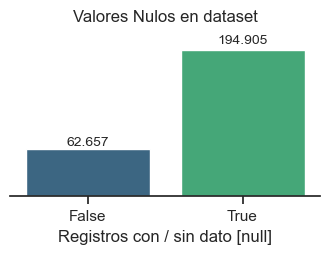

Porcentaje de Nulos: 76%


In [10]:
# Chequeamos registros nulos en cantidades para eliminarlos del modelo

nulos = pd.isnull(df['KG']).value_counts()

#Cambiar tamaño al gráfico
plt.figure(figsize=(4,2))

# Configurar el estilo para quitar los bordes
sns.set(style="ticks", rc={"axes.spines.bottom": True, "axes.spines.top": False, 
                           "axes.spines.right": False, "axes.spines.left": False})

# Crear un gráfico de barras con Seaborn
ax = sns.barplot(x=nulos.index, y=nulos.values, palette='viridis')

# Quitar los marcadores del eje y
ax.yaxis.set_visible(False)

# Agregar etiquetas a los datos
for index, value in enumerate(nulos.values[::-1]):
    ax.text(index, value * 1.02, formato_miles_simple(value), ha='center', va='bottom', fontsize=10)

# # Ajustar el espacio entre el título y el gráfico
# plt.subplots_adjust(top=0.8)    
    
# Añadir etiquetas y título
plt.xlabel('Registros con / sin dato [null]')
plt.title('Valores Nulos en dataset', pad=15)

# Mostrar el gráfico
plt.show()
print(f"Porcentaje de Nulos: {100 * nulos.loc[True] / (nulos.loc[True] + nulos.loc[False]):.0f}%")

    El dataset como se observa, se compone de una gran cantidad de registros nulos de KG (76% de la muestra total). Esto se debe a la que la base fue extraida previo a este estudio con las columnas KG y Precio dinamizadas por semana. Al anular la dinamización de los datos, esto resultó en registros sin valor de KG y Precio.

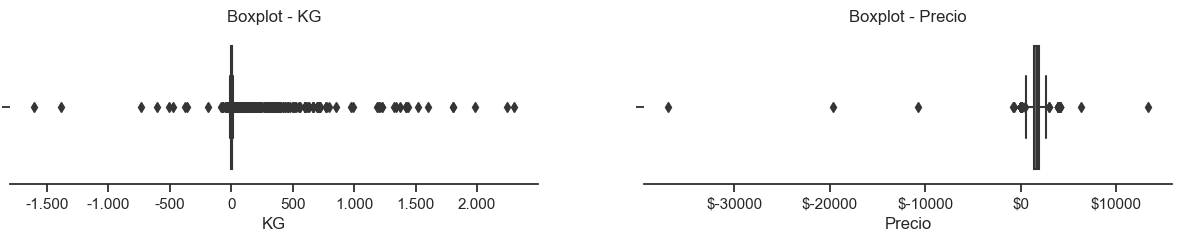

In [11]:
# Crear una figura y ejes compartidos
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(15, 2))

# Boxplot para Campo1
sns.boxplot(x=df['KG'], ax=axs[0], palette = 'viridis')
axs[0].set_title('Boxplot - KG')
axs[0].xaxis.set_major_formatter(FuncFormatter(formato_miles_etiqueta))

# Boxplot para Campo2
sns.boxplot(x=df['Precio'], ax=axs[1], palette = 'viridis')
axs[1].set_title('Boxplot - Precio')
axs[1].xaxis.set_major_formatter(FuncFormatter(formato_dolar_etiqueta))

# Mostrar la figura
plt.show()

    También se observan valores outlier de KGs con valor negativo. Estos registros corresponden a devoluciones de ventas hechas por clientes a las empresas distribuidoras.
    También se observan valores outliers de Precio cercanos a 0. Estos valores corresponden a acciones comerciales hechas por los distribuidores (producto bonificado al cliente al 100%). Es importante destacar que estos valores no son = 0, sino entre 0 y 1, debido a que por disposiciones impositivas, una venta no puede tener precio 0.
    Por último, se observan vvalores negaticos de Precio. Estos corresponden a acciones puntuales de los distribuidores a los clientes que no consideraremos en este análisis por resultar datos outliers.

    Como hemos especificado en el objetivo del trabajo, nos concentraremos en los registros con venta registrada (KG > 0) y no consideraremos los productos entregados de forma bonificada (Precio <= 1) para poder determinar la relación entre volumen de ventas y precio de las ventas concretadas.

In [12]:
#Quitamos vacíos en cantidades
df2 = df.dropna(subset=['KG', 'Precio'])

In [13]:
#Quitamos valores negativos o 0 en KG o en Precio
df3 = df2.drop (df2 [(df2.KG <= 0) | (df2.Precio <= 1)].index)

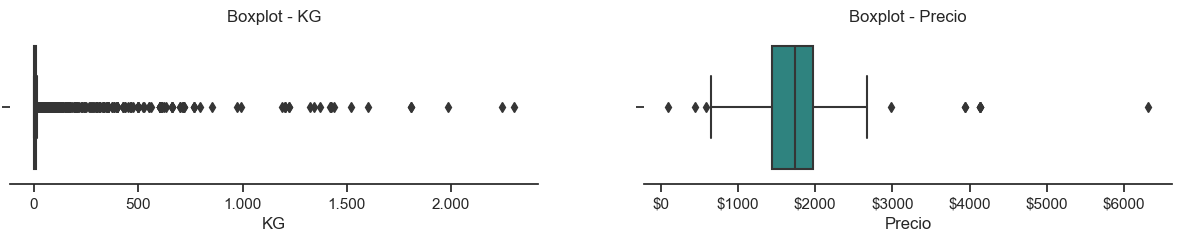

In [14]:
# Crear una figura y ejes compartidos
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(15, 2))

# Boxplot para Campo1
sns.boxplot(x=df3['KG'], ax=axs[0], palette = 'viridis')
axs[0].set_title('Boxplot - KG')
axs[0].xaxis.set_major_formatter(FuncFormatter(formato_miles_etiqueta))

# Boxplot para Campo2
sns.boxplot(x=df3['Precio'], ax=axs[1], palette = 'viridis')
axs[1].set_title('Boxplot - Precio')
axs[1].xaxis.set_major_formatter(FuncFormatter(formato_dolar_etiqueta))

# Mostrar la figura
plt.show()

    Desde el lado de la variable Precio, se lograron eliminar outliers mediante el último método. Sin embargo, se siguen observando otros outliers que deberán ser analizados mediante otras técnicas.
    La variable KG, si bien también mejoró, muestra una alta concentración de datos cerca del valor 0, y además una gran dispersión en los valores, lo cual requiere de un mayor análisis.
    La cantidad de KG debería de comportarse de manera distinta dependiendo el Canal de ventas al cual se realizó la venta. Por ejemplo, canales como Kioscos deberían de mostrar valores distintos a Mayoristas. Graficamos un boxplot por canal para ver si existe tal relación. 

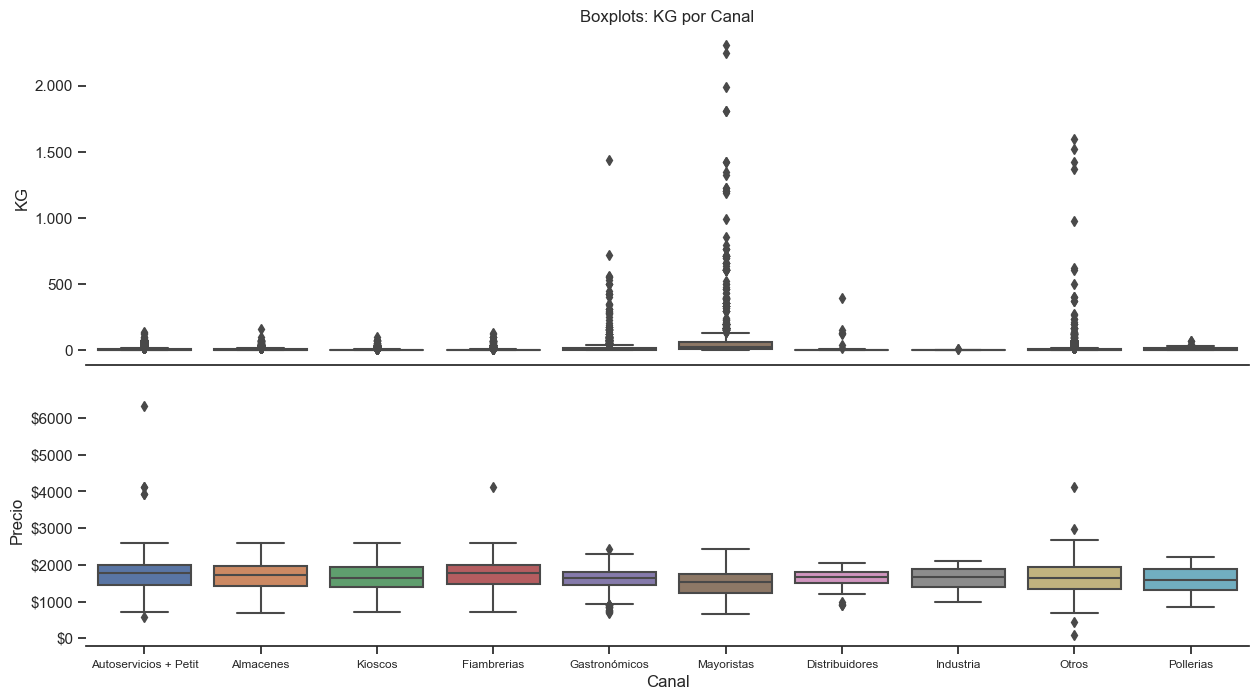

In [15]:
# Crear una figura y ejes individuales
fig = plt.figure(figsize=(15, 8))
gs = gridspec.GridSpec(2, 1, height_ratios=[4, 3])

# Añadir el primer gráfico
ax1 = plt.subplot(gs[0])
sns.boxplot(x=df3['Canal'], y=df3['KG'], ax=ax1)
ax1.yaxis.set_major_formatter(FuncFormatter(formato_miles_etiqueta))
ax1.set_title('Boxplots: KG por Canal')
ax1.set_xlabel('')
ax1.set_xticks([])

# Añadir el segundo gráfico
ax2 = plt.subplot(gs[1])
sns.boxplot(x=df3['Canal'], y=df3['Precio'], ax=ax2)
ax2.yaxis.set_major_formatter(FuncFormatter(formato_dolar_etiqueta))
ax2.tick_params(axis='x', labelsize=8.5)

# Ajustar el espacio entre los gráficos
plt.subplots_adjust(hspace=0.1)

# Mostrar la figura
plt.show()

    Este gráfico nos muestra que los outliers de KG se concentran los canales Gastronómicos, Mayoristas y Otros. Veamos más de cerca la distribución de KG de cada uno de estos canales de venta, vía un histograma por Canal.

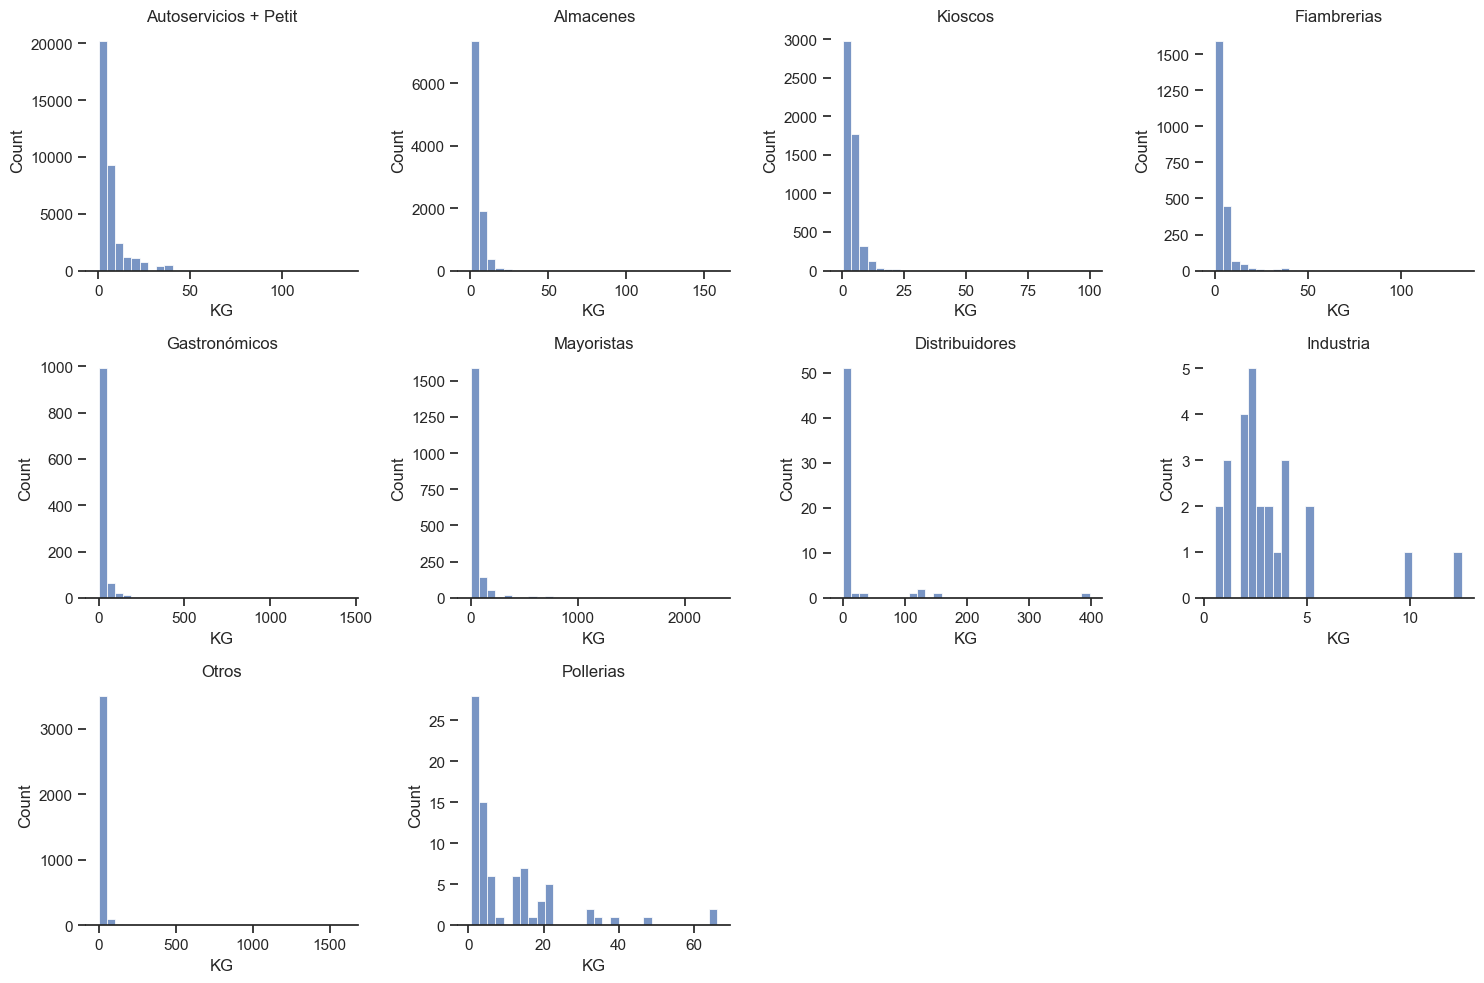

In [16]:
# Crear una figura y ejes con 2 filas y 5 columnas
fig, axs = plt.subplots(3, 4, figsize=(15, 10), sharey=False)

# Aplanar el arreglo de ejes para facilitar el bucle
axs = axs.flatten()

# Generar 10 histogramas, uno por cada canal
for i, canal in enumerate(df3['Canal'].unique()):
    # Filtrar el DataFrame por canal
    datos_canal = df3[df3['Canal'] == canal]
    
    # Generar histograma para el canal actual
    sns.histplot(data=datos_canal, x="KG", ax=axs[i], bins=30)  # Ajusta bins según tus necesidades
    axs[i].set_title(f'{canal}')

# Ocultar los ejes de los gráficos vacíos
for j in range(10, 12):
    axs[j].axis('off')
    
# Ajustar el espacio entre los gráficos
plt.tight_layout()

# Mostrar la figura
plt.show()

    Los histogramas terminan de evidenciar que la muestra presenta una alta concentración de datos con una gran presencia de outliers en todos los canales.

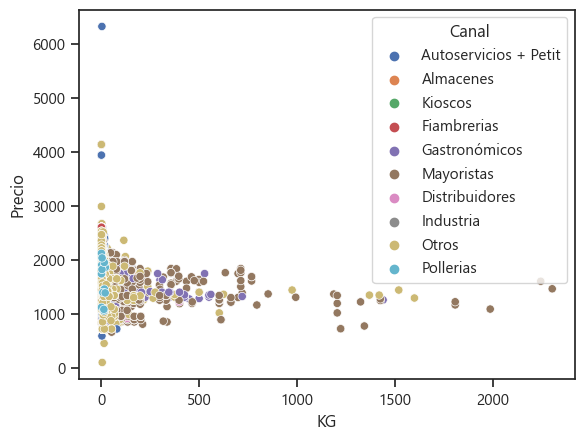

In [20]:
# Crear el gráfico de dispersión con hue
sns.scatterplot(x='KG', y='Precio', hue='Canal', data=df3)

# Mostrar el gráfico
plt.show()

In [436]:
#Chequeamos cantidad de registros por partido y por zona
print(df3.Partido.value_counts())
print()
print(df3.Zona.value_counts())

Partido
CABA                   13009
La Matanza              9527
Merlo                   3761
Tigre                   3490
Vicente López           3294
Lanús                   3104
Morón                   2819
Moreno                  2770
Malvinas Argentinas     2754
Avellaneda              2522
San Isidro              2379
Quilmes                 2233
San Fernando            2025
José C. Paz             1873
Ituzaingó               1439
General Rodríguez       1148
Escobar                  732
Marcos Paz               641
S/D                      374
Tres de Febrero          158
Lomas de Zamora           95
Hurlingham                26
General San Martín        21
San Miguel                16
General Arenales          10
Cañuelas                   6
La Plata                   6
Luján                      1
Berazategui                1
Name: count, dtype: int64

Zona
Oeste       22285
CABA        13009
Norte       11921
Sur          7960
Noroeste     4669
S/D           374
PBA        

In [19]:
#Quitamos valores S/D en Partido y Zona, y valores PBA en Zona
df4 = df3.drop (df3 [(df3.Partido == 'S/D') | (df3.Zona == 'S/D') | (df3.Zona == 'PBA')].index)

In [12]:
#Reemplazamos valores NO, SI en campo Es Feriado por booleanos
df5 = df4.replace("NO","0").replace("SI","1")
df5.shape

(59844, 19)

    A nivel estructura, el dataset se encuentra limpio para ser analizado.
    A nivel estadístico, debemos considerar la posibilidad de outliers en KG y en precio que nos sumen un sesgo al utilizar regresiones o medidas de tendencia central, que al eliminar de la muestra considerada no modifiquen la distribución de la misma. 

        Esto nos indica que existe una fuerte tendencia a haber outliers en KGs pero no así de precios, lo cual descarta al efecto inflacionario como un posible explicativo del fenómeno.

    Graficamos un boxplot de precio y un boxplot de volumen para visualizar ambos.

Text(0.5, 1.0, 'Boxplot - Precio')

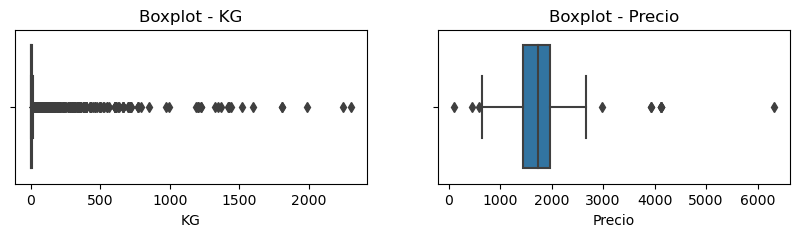

In [13]:
# Crear una figura y ejes compartidos
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(10, 2))

# Boxplot para Campo1
sns.boxplot(x=df5['KG'], ax=axs[0])
axs[0].set_title('Boxplot - KG')

# Boxplot para Campo2
sns.boxplot(x=df5['Precio'], ax=axs[1])
axs[1].set_title('Boxplot - Precio')

    El dataset nos adelantaron que es inflacionario, lo cual por definición nos quitaría poder explicativo del volumen explicado por precios, como únicas variables. En qué marco temporal se ubican las ventas del dataset?

In [97]:
df5.groupby(['Semana', 'Semana (Lunes)'])[['Semana','Semana (Lunes)']].count()

,,Semana,Semana (Lunes)
Semana,Semana (Lunes),,
14,27/3/2023,11117,11117
15,3/4/2023,8674,8674
17,17/4/2023,9363,9363
18,24/4/2023,9568,9568
19,1/5/2023,10000,10000
20,8/5/2023,11122,11122


    El dataset se conforma por ventas en las semanas entre fin de Marzo y primera quincena de Abril, con un faltante de datos en la semana 16 (10/04/2023).
    Como sabemos, el dataset se conforma de datos de AMBA. La inflación en la región AMBA en abril 2023 de Alimentos y Bebidas No Alcohólicas [INDEC] fue de 8,4%.

### El resto del análisis se encontraba en modo exploratorio y no debería ser considerado como el definitivo.
### Como planificado para el EDA, falta:
#####         Eliminación de outliers mediante método intercuartil,
#####         Histograma de precio / KG por tipo de producto, o por U / Pack,
#####         Análisis de precio por Canal y por Zona
#####         Scatterplot de precio/demanda por Canal, Producto, Zona, u otros

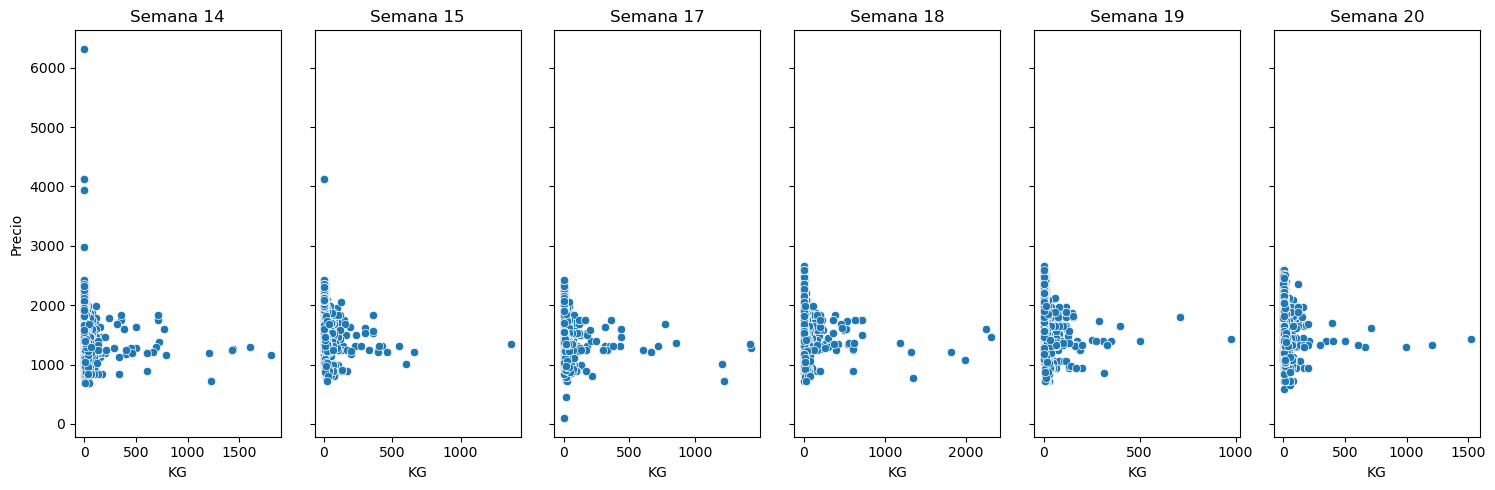

In [93]:
# Crear una figura y ejes compartidos
fig, axs = plt.subplots(1, 6, sharey=True, figsize=(15, 5))  # 1 fila, 3 columnas

# Scatter plot 1
sns.scatterplot(x='KG', y='Precio', data=df5[df5['Semana']==14], ax=axs[0])
axs[0].set_title('Semana 14')

# Scatter plot 2
sns.scatterplot(x='KG', y='Precio', data=df5[df5['Semana']==15], ax=axs[1])
axs[1].set_title('Semana 15')

# Scatter plot 3
sns.scatterplot(x='KG', y='Precio', data=df5[df5['Semana']==17], ax=axs[2])
axs[2].set_title('Semana 17')

# Scatter plot 4
sns.scatterplot(x='KG', y='Precio', data=df5[df5['Semana']==18], ax=axs[3])
axs[3].set_title('Semana 18')

# Scatter plot 5
sns.scatterplot(x='KG', y='Precio', data=df5[df5['Semana']==19], ax=axs[4])
axs[4].set_title('Semana 19')

# Scatter plot 6
sns.scatterplot(x='KG', y='Precio', data=df5[df5['Semana']==20], ax=axs[5])
axs[5].set_title('Semana 20')

# Ajustar el diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()

    Por otro lado, el dataset incluye datos de varios canales de venta.

In [42]:
df5.Canal.value_counts()

Canal
Autoservicios + Petit    35837
Almacenes                 9788
Kioscos                   5286
Otros                     3618
Fiambrerias               2203
Mayoristas                1862
Gastronómicos             1104
Pollerias                   62
Distribuidores              58
Industria                   26
Name: count, dtype: int64

Los canales podría ocurrir que tengan distintos precios si algunos canales (los clientes de los distribuidores) fueron ellos mismos modalidad B2B o B2C. Esto lo podríamos observar comparando el precio al que se le vendió a cada canal.}

[Text(0, 0, 'Autoservicios + Petit'),
 Text(1, 0, 'Almacenes'),
 Text(2, 0, 'Kioscos'),
 Text(3, 0, 'Fiambrerias'),
 Text(4, 0, 'Gastronómicos'),
 Text(5, 0, 'Mayoristas'),
 Text(6, 0, 'Distribuidores'),
 Text(7, 0, 'Industria'),
 Text(8, 0, 'Otros'),
 Text(9, 0, 'Pollerias')]

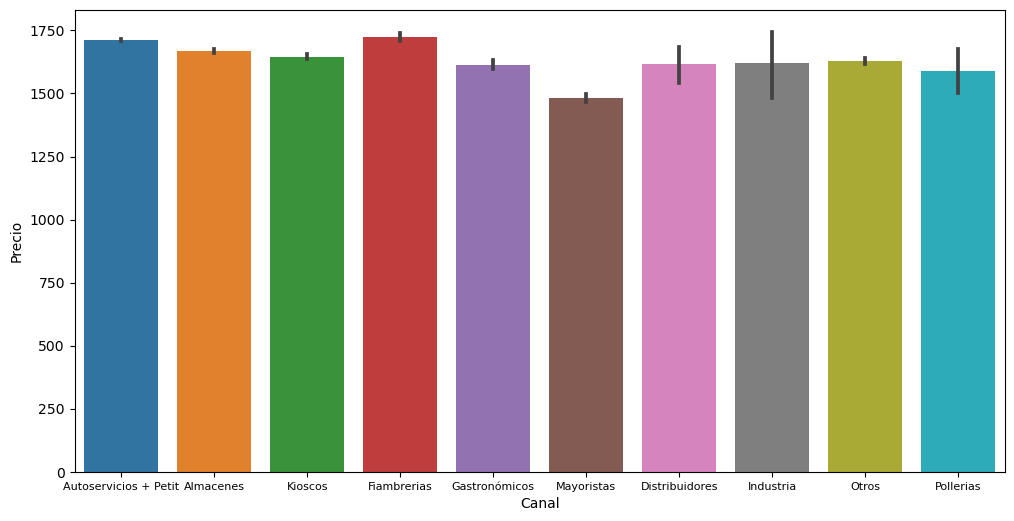

In [69]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df5, x='Canal', y='Precio')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=8)